<a href="https://colab.research.google.com/github/benvictoria17/pandas/blob/master/time_series_analysis_and_forecasting_bitcoins_jma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/%20Bitcoin%20Trends/CBBTCUSD.csv")
df.head()

,DATE,CBBTCUSD
0,2015-08-19,227.34
1,2015-08-20,235.56
2,2015-08-21,232.85
3,2015-08-22,231.15
4,2015-08-23,229.21


In [3]:
df.describe()

,CBBTCUSD
count,1828.000000
mean,5035.927484
std,4022.727109
min,211.160000
25%,737.592500
50%,4738.720000
75%,8256.002500
max,19650.010000


In [4]:
df = df.sort_values("DATE")
print(df.head(1))
df.isnull().sum()

         DATE  CBBTCUSD
0  2015-08-19    227.34


DATE        0
CBBTCUSD    0
dtype: int64

In [5]:
df.groupby("DATE")["CBBTCUSD"].sum().reset_index()
print(df['DATE'].min())
print(df['DATE'].max())

2015-08-19
2020-08-19


In [6]:
from fbprophet import Prophet
df1=df.rename(columns={"DATE": "ds", "CBBTCUSD": "y"})
df1
m = Prophet()
m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2188,2021-08-15
2189,2021-08-16
2190,2021-08-17
2191,2021-08-18
2192,2021-08-19


In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2188,2021-08-15,10302.558485,2346.867771,18028.833142
2189,2021-08-16,10300.483909,2069.419851,17971.552264
2190,2021-08-17,10256.600403,2248.983942,17591.086368
2191,2021-08-18,10226.137142,1880.341754,17969.415269
2192,2021-08-19,10166.764868,1814.634640,18007.957129


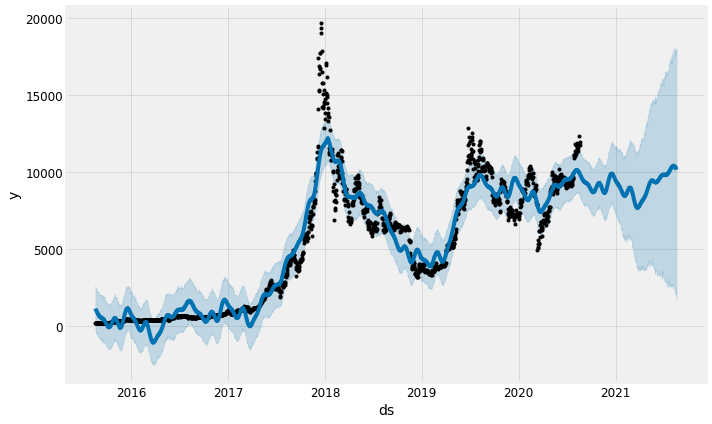

In [9]:
fig1 = m.plot(forecast)

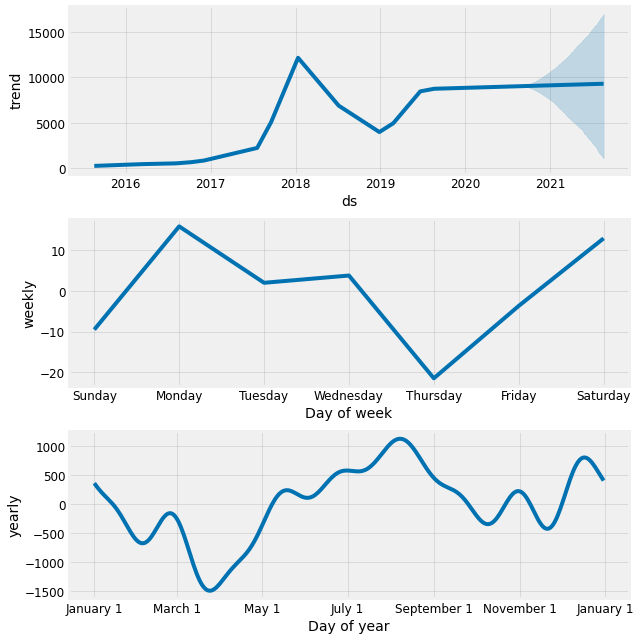

In [10]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)